# Distant Reading, практика, часть I

Сегодня мы начнем говорить о том, какими методами и инструментами можно делать Distant Reading различных текстов.  

## Disclaimer
Результаты количественного анализа больших объемов текста **не всегда хорошо интерпретируемы**. Это может быть связано с:
* нашим недостаточным знанием материала
* плохим выбором того, "что считать"
* неудачно подобранным набором текстов
* отсутствием черной кошки в темной комнате... 🐈

В этой части мы исследуем методы учимся их применять. Если получается интересное -- это хорошо, но цель в освоении методов.

## Введение: а что мы вообще можем?
![distant_reading_map](pics/distant_reading_map.jpg)

## Про способ № 2 (использование готовых корпусов) мы с вами уже немного поговорили, когда обсуждали Ngram Viewer

Вот еще примеры использования [НКРЯ](http://ruscorpora.ru) для distant reading'а:
* [Корпусный анализ русского стиха (видео Б.В. Орехова на постнауке)](https://postnauka.ru/video/85900 "Кликни и увидь")
* [Разные публикации Б.В. Орехова"](http://nevmenandr.net/bo.php), в которых есть слово "корпусный
* [A.A. Bonch-Osmolovskaya, Two Centuries of Russian Roads – Diachronic Study of Polysemy in the Context of Cultural Change](https://dh2016.adho.org/abstracts/413 "Кликни и прочти")
* [А.А. Бонч-Осмоловская, Корпусные наблюдения над портретами героев в "Войне и мире"](http://veeb.ut.ee/FLVE/ruslit/sobolev/1.pdf "Кликни и прочти")

## Теперь поговорим про способы № 1 (готовые корпусные менеджеры) и потом № 0 (на примере Python)

## Способ 1: корпусные менеджеры

### Voyant Tools

Вот [Voyant Tools](https://voyant-tools.org/) — популярный инструмент для входа в Digital Humanities. Простой, но имеет ограничения.

А вот **[наш с вами корпус фантастики](https://voyant-tools.org/?corpus=ad00c40ec4549bc30c185cf7f65c9318)**, загруженный в него. 

И вот еще несколько примеров поменьше: 
* [Главная страница Интерфакса за 3 месяца: январь-март 2014](https://voyant-tools.org/?corpus=8943e7b961f87daf226162f5a3f5e8da). 
* ["Война и мир" по томам](https://voyant-tools.org/?corpus=d6d851113e8787d79055aa1b434a37bd)

### Полезный факт: Voyant Tools можно запускать и локально

Вам понадобится скачать Voyant Server [отсюда](http://docs.voyant-tools.org/resources/run-your-own/voyant-server/) (тут же есть все инструкции) и еще установить Java. После запуска VoyantServer.jar ваш компьютер запустит локальный сервер, который будет делать то же самое, что и онлайновый Voyant, но прямо на вашем компьютере. 

NB: Качать Voyant Server сейчас через вышкинскую сеть не надо, он тяжелый

## Частотности слов и конструкций, добавление/редактирование списка стоп-слов

Я уже лемматизировал наш корпус (подробнее об этом ниже). Поэтому вордклауд, который вам по умолчанию выдает Voyant в левом окошке, в нашем случае основан на частотностях лемм ☝️
![Человек](pics/wordcloud.png)
*почти 33 тыс. раз упоминаются люди и человеки в нашем корпусе фантастики!*


Через Scale можно выбрать показ облака для всего корпуса, или для отдельных документов. При помощи слайдера под облаком можно отрегулировать количество слов в облаке. 

![scale_terms](pics/scale_terms.png)

Сами частотности можно посмотреть во вкладке Terms (кнопка над облаком):

![Terms](pics/terms.png)
    
Как видите, тут довольно много служебных и околослужебных слов, которые нам неинтересны, вроде свой. А еще совсем недавно Voyant вообще не знал русских стоп-слов, и при первой загрузке получалось что-то такое:

![Без стоп-слов](pics/wordcloud_nostop.png)

К счастью, в Voyant есть функционал заливки списка стоп-слов. Можно вставить туда свой список:

![пикча](pics/define_options.png)
![пикча](pics/new_stoplist.png)

Вот мои [стоп-слова](stop_ru.txt), украденные откуда-то из интернета. После применения стоп-слов получается что-то такое: 

![пикча](pics/wordcloud_mystop.png)
*Корабль? Машина? Это уже чуть-чуть интереснее!*


## Графики 📈

Voyant часто используют для построения графиков (а ля Google Ngram Viewer, но на вашем материале). Если ваш корпус имеет временн*у*ю протяженность, это бывает интересно. 

Ср. например, радио* (т.е. все слова, начинающиеся на "радио") и слово компьютер:
![Радио и компьютер](pics/radiovscomp.png )

А вот пример из корпуса [Интерфакса за январь-март 2014](https://voyant-tools.org/?corpus=8943e7b961f87daf226162f5a3f5e8da) — слова "украина","олимпиада", "крым":

![Крым](pics/crimea.png )

Показать пример из ["Войны и мира"](https://voyant-tools.org/?corpus=d6d851113e8787d79055aa1b434a37bd)

## Экспорт данных и изображений

## Коллокации в Voyant



## Прочие окошки в Voyant 

### Reader
![reader](reader.jpg)

Панель Reader позволяет просматривать корпус как один непрерывный текст. Расположение читаемого текста относительно всего корпуса представлено внизу в виде разноцветных столбиков. Каждый столбик - это отдельный документ в корпусе. Его высота и ширина зависят от объема этого документа.
При наведении на слово можно посмотреть на его частоту в документе.


## AntConc

[AntConc](http://www.laurenceanthony.net/software.html) — саперная лопатка мира корпусных менеджеров. Простая, но с ограниченными возможностями. Тем не менее там есть кое-что, чего нет в Voyant. Например:
* Более умные меры подсчета коллокаций
* Возможность загрузить словарь лемм, чтобы тексты лемматизировались прямо внутри программы
* Контрастивный анализ (выделение слов, которые характеризуют ваш корпус относительно какого-то референтного корпуса)

# Способ 0. Работаем в Питоне

## Как использовать этот код 
### (можно пропустить эту часть, если вы знаете, что такое Jupyter и ipynb-тетрадки -- в таком случае переходите сразу к "Начало работы")
То, на что вы сейчас смотрите — тетрадка Jupyter Notebook. Это одна из популярных сред для написания и __демонстрации__ кода на Python (и не только). Jupyter запускает питоновский код прямо в браузере (но локально, т.е. код исполняет ваш компьютер, в отличие от, например Google Colab). В Jupyter код можно запускать не целиком, а по ячейкам (в отличие от IDLE). 

Пример:

In [31]:
# ячейка с кодом
text = 'Мы с Даней сегодня тестим инструменты дистант ридинга'
print (text)

Мы с Даней сегодня тестим инструменты дистант ридинга


In [32]:
# еще одна ячейка с кодом. 
# Пространство имен общее — переменная text была заполнена в предыдущей ячейке
print (text.upper())

МЫ С ДАНЕЙ СЕГОДНЯ ТЕСТИМ ИНСТРУМЕНТЫ ДИСТАНТ РИДИНГА


Кроме того, ячейки бывают текстовыми — их можно форматировать с помощью формата разметки markdown (.md). Текст, который вы сейчас читаете, а также всякие описания и картинки выше, написаны как раз в таком формате. Файлы Jupyter Notebook имеют расширение .ipynb и автоматически рендерятся гитхабом. Например, вот эта __[тетрадка](https://github.com/DanilSko/itmo/blob/master/ITMO_practice/BasicProcessing/Basic%20text%20processing%20Danya%20ITMO.ipynb)__  у меня на гитхабе.  

## Окей, а как я могу запустить код в таком .ipynb?

Есть разные варианты: 

### Через __[Google Colab](https://colab.research.google.com)__. 

Google Colab — это гугловский инструмент для написания кода в браузере и запуска прямо на серверах Google (с возможностью бесплатно использовать их вычислительные мощности, в т.ч. графические процессор  — GPU).  Google Colab — родственник Jupyter, они очень похожи. Разница в том, что Jupyter работает локально и использует ваш собственный питон, а Google Colab — это облачный сервис, похожий на Google Docs: вы можете делиться тетрадками и т.д. В Colab можно открыть эту тетрадку, указав ссылку на нее: 

![Colab](pics/github2colab.png) 

Просто загрузить .ipynb-файл в Colab тоже можно. 

### Скачать себе .ipynb и открыть в Jupyter

Скачать .ipynb с гитхаба: 

![Raw](pics/raw_download.png) 

Поставить Jupyter Notebook по инструкции __[отсюда](https://jupyter.readthedocs.io/en/latest/install.html)__. Открыть терминал (в Windows — командную строку).пойти в папку, внутри которой лежит скачанный .ipynb, написать там jupyter notebook. После этого у вас должно открыться в браузере что-то такое:

![Colab](pics/jupyter2.png)

Тыкайте на тетрадку -- и все, можно работать в ней, писать код и т.п. Из Jupyter можно выгрузить и отдельно код в виде файла .py (но тогда разделение на ячейки пропадет).

### Скачать .ipynb и открыть в PyCharm
Если вы любите популярную у питонистов IDE PyCharm  -- она умеет открывать ipynb. Но для этого все равно нужен установеленный Jupyter. Поэтому надо проделать все то же, что в предыд.пункте, а потом открыть файл в PyCharm.

### (хак) Скачать файл .py из Google Colab или Jupyter и открыть в PyCharm или любой IDE
Из Colab после создания копии вы можете выгрузить не весь .ipynb, а только код в .py. Этот код уже можно запускать где угодно, хоть из командной строки (терминала) вашего компьютера. 

# Начало работы

In [21]:
# проверим, что рядом в папке лежит файл с Преступлением и наказанием.
!ls

1959_Adamov_Tayna_2_okeanov.txt whole_corpus.txt
first_dr_notebook.ipynb


In [ ]:
## У тех, кто смотрит в колабе, его, естественно, не будет. Поэтому вот стандартный код для загрузки в колаб
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

 __[Ссылка на текстовый файл с Преступлением и наказанием](https://github.com/DanilSko/itmo/blob/master/ITMO_practice/BasicProcessing/Dostoevsky_PrestuplenieINakazanie.txt)__. 

In [22]:
# откроем файл в питоне
path_to_file = 'whole_corpus.txt'
prest_i_nak = open (path_to_file, 'r')
prest_i_nak_kak_stroka = prest_i_nak.read()

In [23]:
## попробуйте вывести тут длину строки с помощью функции len; надо написать len (prest_i_nak_kak_stroka) -- так вы передадите в функцию len ваш текст, считанный в сторку 
len (prest_i_nak_kak_stroka)

75104600

In [4]:
## попробуйте получить срез из первых 100 символов вашей строки с помощью срезов списка [:]
## т.е. напишите ниже вот это: prest_i_nak_kak_stroka [:100]
## и нажмите выполнить
prest_i_nak_kak_stroka [-500:]

'й поход, и,\nвзмахивать листок, восклицать:\n     -- слушать радиограмма центральный  комитет коммунистический партия и\nправительство!\n     двадцать  пять  пара глаз восторженно устремляться к капитан, и  громкий\nголос  его  чеканно   звучать  сквозь   рев  гудок   и   сирена,  сквозь  гул\nприветственный крик,  и,  словно  во  внезапно наступать  немой  тишина,\nкаждый слово радиограмма  явственно  доноситься к тот,  кто  подхватывать он\nнапряженный ухо и чуткий, переполненный от счастие сердце...\n'

# Сегментация текста

## 0. Простейший способ сегментации строки на токены (как бы на слова, но тупее грубее) — питоновский встроенный метод .split:

In [5]:
prest_i_nak_kak_spisok_slov = prest_i_nak_kak_stroka.split() ## здесь в качестве аргумента можно воткнуть разделитель; по умолчанию это любое количество пробелов
#print ('Примерное количество слов в "Преступлении и наказании":', len (prest_i_nak_kak_spisok_slov))

In [6]:
'I love ITMO'.split()


['I', 'love', 'ITMO']

In [7]:
prest_i_nak_kak_spisok_slov[:200]

#type (prest_i_nak_kak_stroka)

['*',
 'часть',
 'первый',
 '*',
 'глава',
 'I.',
 'прерывать',
 'разговор',
 'до',
 'рассвет',
 'оставаться',
 'уже',
 'немного.',
 'из',
 'комната',
 'на',
 'четырнадцатый',
 'этаж,',
 'сквозь',
 'щелка',
 'между',
 'плотный',
 'портьера,',
 'во',
 'влажный',
 'темнота',
 'двор',
 'пробиваться',
 'слабый,',
 'едва',
 'заметный',
 'полоска',
 'свет.',
 'маленький',
 'настольный',
 'лампа',
 'под',
 'низкий',
 'черный',
 'абажур',
 'бросать',
 'яркий',
 'конус',
 'свет',
 'на',
 'небольшой',
 'участок',
 'географический',
 'карта,',
 'раскладывать',
 'на',
 'стол.',
 'все',
 'кругом',
 'теряться',
 'в',
 'густой',
 'сумрак.',
 'два',
 'человек',
 'склоняться',
 'над',
 'карта.',
 'их',
 'лицо',
 'быть',
 'неразличимый,',
 'в',
 'полумрак',
 'мерцать',
 'лишь',
 'глаз:',
 'один',
 '--',
 'узкий,',
 'косо',
 'поставлять,',
 'тусклый,',
 'равнодушный;',
 'другой',
 '--',
 'большой,',
 'гореть,',
 'глубоко',
 'западать',
 'в',
 'чернота',
 'глазница.',
 'смутный',
 'контур',
 'проступать',

### попробуем получить список уникальных слов:

In [8]:
prest_i_nak_kak_mnojestvo = set(prest_i_nak_kak_spisok_slov)
len (prest_i_nak_kak_mnojestvo)

18081

In [9]:
prest_i_nak_kak_mnojestvo_slov = set (prest_i_nak_kak_spisok_slov)
len (prest_i_nak_kak_mnojestvo_slov)
prest_i_nak_kak_spisok_unikalnyh_slov = list (prest_i_nak_kak_mnojestvo_slov)
(prest_i_nak_kak_spisok_unikalnyh_slov).sort()
prest_i_nak_kak_spisok_unikalnyh_slov [:1000]

['!',
 '"--',
 '"...',
 '"...гассовый',
 '"5',
 '"I)',
 '"Бу-бу-бу...',
 '"Бу-бу-бу..."',
 '"Бу-бу...',
 '"а',
 '"авария!',
 '"авария...',
 '"ага!',
 '"айсберг"',
 '"ах,',
 '"безграмотный"',
 '"белый',
 '"бигль".',
 '"быть,',
 '"в',
 '"вальдивия"',
 '"велыкий',
 '"вероятно,--',
 '"винт!..',
 '"винцо"',
 '"витязь"',
 '"вкл"',
 '"вкл".',
 '"внимание!',
 '"возмутительный',
 '"возмутительный",',
 '"вольно",',
 '"вот',
 '"выбираться"!',
 '"выкла".',
 '"гигантский',
 '"гипобитие',
 '"главный',
 '"голос',
 '"гольфстрим".',
 '"гольфштрем".',
 '"готовиться',
 '"давать"',
 '"даже',
 '"дама"',
 '"десять',
 '"диоген"',
 '"диоген",',
 '"диоген".',
 '"для',
 '"дюзовый',
 '"если',
 '"ждать.',
 '"живой',
 '"за',
 '"завет',
 '"задний',
 '"зажигать',
 '"зачем',
 '"здесь',
 '"знак',
 '"идзумо"',
 '"из',
 '"инцидент",',
 '"испортиться',
 '"к"..',
 '"кажется,',
 '"как',
 '"какой',
 '"канат,',
 '"караул"...',
 '"кашалот!"',
 '"кипеть"',
 '"кислород"',
 '"командир',
 '"конкурс',
 '"координата"...',
 '"коорди

## 1. Более умный способ: сегментируем текст регекспом

In [10]:
## питоновский модуль для регекспов
import re

In [11]:
prest_i_nak_spisok_re =  re.split ('( +|[.,!? –]|\n)',prest_i_nak_kak_stroka)

In [12]:
prest_i_nak_spisok_re [:10]

['*', ' ', 'часть', ' ', 'первый', ' ', '*', ' ', '', '\n']

## 2. Еще более умный способ: сегментируем текст готовым токенизатором — возьмем его из прекрасной библиотеки для обработки языка NLTK 

In [13]:
# если у вас еще нет nltk, установите его:
!pip install nltk

In [24]:
from nltk.tokenize import word_tokenize
clean_prest_i_nak_kak_stroka = re.sub ('[.,?!-:]', '', prest_i_nak_kak_stroka)
prest_i_nak_nltk_tokenized = word_tokenize (clean_prest_i_nak_kak_stroka)

In [16]:
prest_i_nak_nltk_tokenized [:100]

['часть',
 'первый',
 'глава',
 'I',
 'прерывать',
 'разговор',
 'до',
 'рассвет',
 'оставаться',
 'уже',
 'немного',
 'из',
 'комната',
 'на',
 'четырнадцатый',
 'этаж',
 'сквозь',
 'щелка',
 'между',
 'плотный',
 'портьера',
 'во',
 'влажный',
 'темнота',
 'двор',
 'пробиваться',
 'слабый',
 'едва',
 'заметный',
 'полоска',
 'свет',
 'маленький',
 'настольный',
 'лампа',
 'под',
 'низкий',
 'черный',
 'абажур',
 'бросать',
 'яркий',
 'конус',
 'свет',
 'на',
 'небольшой',
 'участок',
 'географический',
 'карта',
 'раскладывать',
 'на',
 'стол',
 'все',
 'кругом',
 'теряться',
 'в',
 'густой',
 'сумрак',
 'два',
 'человек',
 'склоняться',
 'над',
 'карта',
 'их',
 'лицо',
 'быть',
 'неразличимый',
 'в',
 'полумрак',
 'мерцать',
 'лишь',
 'глаз',
 'один',
 'узкий',
 'косо',
 'поставлять',
 'тусклый',
 'равнодушный',
 ';',
 'другой',
 'большой',
 'гореть',
 'глубоко',
 'западать',
 'в',
 'чернота',
 'глазница',
 'смутный',
 'контур',
 'проступать',
 'фигура',
 'этот',
 'человек',
 'сиде

### А теперь давайте посчитаем частотность слов в нашем списке слов; т.е. собственно как часто повторяется каждое

In [25]:
## для этого мы тоже не станем писать свое решение с нуля, а воспользуемся готовым от NLTK
## возьеме токенизированный список — и засунем его в функцию FreqDist от NLTK
from nltk import FreqDist
word_freqs_prest_i_nak = FreqDist(prest_i_nak_nltk_tokenized)
word_freqs_prest_i_nak.most_common (100)

[('и', 358553),
 ('в', 255958),
 ('не', 237412),
 ('он', 188485),
 ('на', 185269),
 ('я', 172251),
 ('быть', 147363),
 ('что', 145926),
 ('–', 122995),
 ('с', 117710),
 ('а', 82946),
 ('—', 82578),
 ('она', 76936),
 ('это', 74810),
 ('как', 71209),
 ('но', 69833),
 ('они', 68680),
 ('к', 62860),
 ('ты', 57482),
 ('мы', 54636),
 ('сказать', 53939),
 ('вы', 53929),
 ('у', 50464),
 ('этот', 50012),
 ('по', 45879),
 ('все', 44861),
 ('из', 42802),
 ('за', 42273),
 ('то', 42231),
 ('же', 40635),
 ('весь', 39390),
 ('от', 38664),
 ('так', 37352),
 ('мочь', 37143),
 ('свой', 36524),
 ('который', 35217),
 ('человек', 32594),
 ('бы', 31683),
 ('о', 30005),
 ('еще', 29640),
 ('только', 29584),
 ('один', 29523),
 ('себя', 29124),
 ('его', 28029),
 ('такой', 27675),
 ('знать', 26437),
 ('тот', 25623),
 ('уже', 25010),
 ('если', 24667),
 ('для', 23583),
 ('рука', 22885),
 ('когда', 22688),
 ('«', 22487),
 ('»', 22395),
 ('вот', 20331),
 ('становиться', 20165),
 ('время', 20106),
 ('да', 20105),
 ('

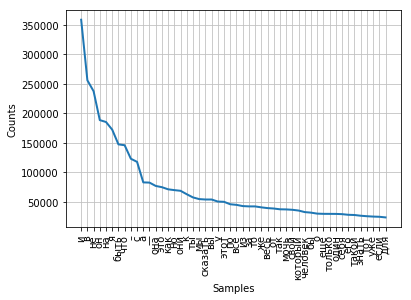

In [26]:
word_freqs_prest_i_nak.plot(50, cumulative=False)

# Стемминг, лемматизация, морфологический анализ

### В том же NLTK есть готовая реализация стеммера для русского языка. Давайте потестируем ее!

In [56]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

In [57]:
## стеммер не быстрый, поэтому давайте возьмем первые 1000 слов, а не все
first_1000 = prest_i_nak_nltk_tokenized[:1000]
## этот стеммер не умеет сам токенизировать -- он работает только с отдельными словами. 
## Поэтому придется скармливать ему наш список по одному: 
prest_i_nak_first_1000_stemmed = []
for word in first_1000:
    prest_i_nak_first_1000_stemmed.append (stemmer.stem(word))

In [60]:
en_stemmer = SnowballStemmer("english")
string = 'I love teaching students at ITMO'
tostem = string.split()
for word in tostem:
    print (en_stemmer.stem(word))

i
love
teach
student
at
itmo


In [ ]:
prest_i_nak_first_1000_stemmed

# Лемматизация текста

### MyStem

__[Mystem](https://tech.yandex.ru/mystem/)__ - это свободно распространяемый морфологический анализатор для русского языка с закрытым исходным кодом. То есть мы можем его бесплатно скачать с сайта и пользоваться им, но не можем посмотреть, что у него внутри и как оно работает.

Mystem был придуман одним из создателей Яндекса Ильёй Сегаловичем. Некоторый потомок Mystem'а до сих пор работает внутри большого поисковика Яндекса, анализируя слова при поиске.

MyStem значит my stemmer. Как мы с вами уже знаем (см. выше), стемминг -- это разбиение формы на основу и флексию. Программы-стеммеры умеют превращать фразу 'Маша поехала за грибами' в 'Маш поехал за гриб'.  Но на самом деле MyStem не стеммер, а полноценный морфологический АНАЛИЗАТОР. Он может гораздо больше: устанавливать словарную форму слова, определять часть речи и грамматические характеристики (падеж, число, время, род...). В последних версиях Mystem умеет и выбирать из нескольких возможных грамматических разборов один, наиболее верный.

У Mystem нет графического оконного интерфейса, запустить его можно только из командной строки. Зато есть обертка для Python — pymystem3.

__[Документация к MyStem](https://tech.yandex.ru/mystem/doc/index-docpage/)__

In [ ]:
# эта клетка нужна вам, если у вас не установлен модуль pymystem3. 
!pip install pymystem3

In [ ]:
## импортируем непосредственно класс "анализатор MyStem" из pymystem3
from pymystem3 import Mystem

In [ ]:
help (Mystem()) ## всегда полезно почитать хелпы!

In [62]:
moi_analizator = Mystem() ## создаем анализатор
test = 'Даня тестирует машинную морфологию' ## создаем тестовую строку
lemmatized = moi_analizator.lemmatize(test) ## лемматизируем строку с помощью mystem 
print (lemmatized) ## напечатаем лемматизированную строку

['даня', ' ', 'тестировать', ' ', 'машинный', ' ', 'морфология', '\n']


In [65]:
prest_i_nak_by_mystem = moi_analizator.lemmatize(clean_prest_i_nak_kak_stroka) ## лемматизируем преступление и наказание с помощью mystem 
#print  (prest_i_nak_kak_by_mystem)

In [ ]:
word_freqs_prest_i_nak = FreqDist(prest_i_nak_by_mystem)
word_freqs_prest_i_nak.most_common (100)

# для практикума в Voyant Tools

## __[ссылка на Voyant Tools](https://voyant-tools.org/)__
## __[ссылка на корпус Преступление и наказания](https://voyant-tools.org/?corpus=7a14151684244d604e29fed45c15ddee)__
## __[ссылка на корпус Интерфакса](https://voyant-tools.org/?corpus=7a75cd0aec5b6c5652385c629df5c6f5)__

## __[Война и мир](https://voyant-tools.org/?corpus=d6d851113e8787d79055aa1b434a37bd)__

## __[Стоп-слова](stop_ru.txt)__